In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import statsmodels.api as sm

rcParams['font.family'] = 'serif'

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/AreaPreservada1.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 2023
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 2023)]

# Criar precipitation_df baseado nos dados filtrados
precipitation_df = df_filtered.groupby("Ano")["Precipitação"].sum().reset_index()
precipitation_df.rename(columns={"Precipitação": "Total_Precipitação"}, inplace=True)

# Função para análise de precipitação
def analyze_precipitation_data(precipitation_df):
    # Precipitação média anual
    mean_precipitation = precipitation_df["Total_Precipitação"].mean()

    # Precipitação mínima e máxima
    min_precipitation = precipitation_df["Total_Precipitação"].min()
    max_precipitation = precipitation_df["Total_Precipitação"].max()

    # Ano com menor e maior precipitação
    min_year = precipitation_df.loc[precipitation_df["Total_Precipitação"].idxmin(), "Ano"]
    max_year = precipitation_df.loc[precipitation_df["Total_Precipitação"].idxmax(), "Ano"]

    # Aumento percentual da precipitação ao longo dos anos
    initial_precipitation = precipitation_df.iloc[0]["Total_Precipitação"]
    final_precipitation = precipitation_df.iloc[-1]["Total_Precipitação"]
    percentage_change = ((final_precipitation - initial_precipitation) / initial_precipitation) * 100

    # Exibir resultados no terminal
    print("\n--- Análise da Precipitação Anual ---")
    print(f"Precipitação Média Anual (mm): {mean_precipitation:.2f}")
    print(f"Precipitação Mínima Anual (mm): {min_precipitation} (Ano: {min_year})")
    print(f"Precipitação Máxima Anual (mm): {max_precipitation} (Ano: {max_year})")
    print(f"Aumento Percentual ao longo dos anos: {percentage_change:.2f}%\n")

    # Retornar os resultados
    return {
        "Precipitação Média Anual (mm)": mean_precipitation,
        "Precipitação Mínima Anual (mm)": min_precipitation,
        "Ano Mínimo": min_year,
        "Precipitação Máxima Anual (mm)": max_precipitation,
        "Ano Máximo": max_year,
        "Aumento Percentual (%)": percentage_change
    }

# Realizar a análise de precipitação
precipitation_analysis = analyze_precipitation_data(precipitation_df)

# Exibir o DataFrame de resultados
print(precipitation_analysis)



--- Análise da Precipitação Anual ---
Precipitação Média Anual (mm): 2108.06
Precipitação Mínima Anual (mm): 1729.8014115071087 (Ano: 1983)
Precipitação Máxima Anual (mm): 2572.4270779643166 (Ano: 2013)
Aumento Percentual ao longo dos anos: 10.71%

{'Precipitação Média Anual (mm)': 2108.0645456489456, 'Precipitação Mínima Anual (mm)': 1729.8014115071087, 'Ano Mínimo': 1983, 'Precipitação Máxima Anual (mm)': 2572.4270779643166, 'Ano Máximo': 2013, 'Aumento Percentual (%)': 10.712658764542436}


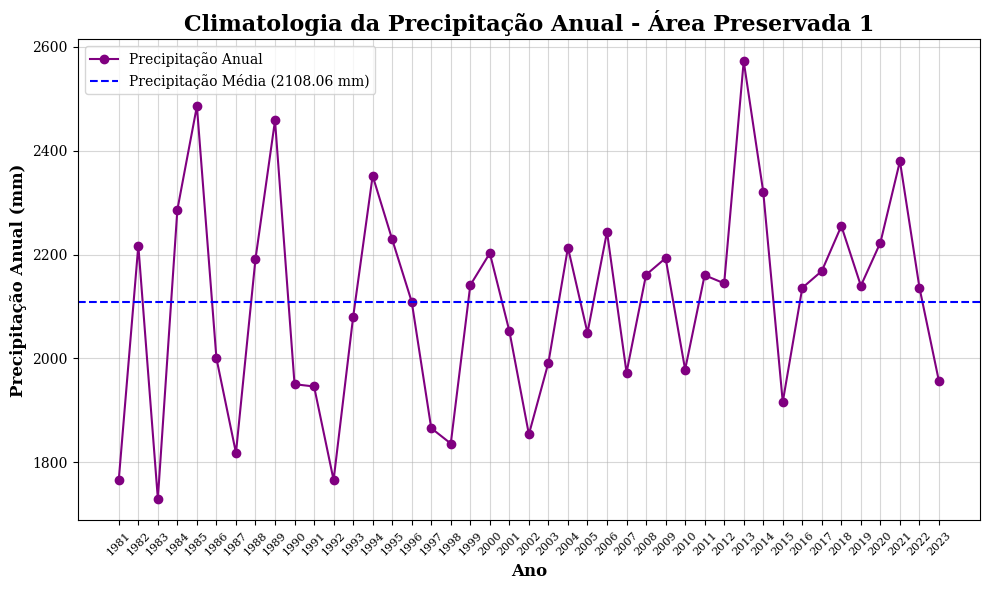


--- Precipitação Média Anual ---
Ano 1981.0: 1766.33 mm
Ano 1982.0: 2217.29 mm
Ano 1983.0: 1729.80 mm
Ano 1984.0: 2286.47 mm
Ano 1985.0: 2485.78 mm
Ano 1986.0: 2000.11 mm
Ano 1987.0: 1817.97 mm
Ano 1988.0: 2191.63 mm
Ano 1989.0: 2458.22 mm
Ano 1990.0: 1950.21 mm
Ano 1991.0: 1945.82 mm
Ano 1992.0: 1765.66 mm
Ano 1993.0: 2079.55 mm
Ano 1994.0: 2351.72 mm
Ano 1995.0: 2229.05 mm
Ano 1996.0: 2109.00 mm
Ano 1997.0: 1865.50 mm
Ano 1998.0: 1835.92 mm
Ano 1999.0: 2141.02 mm
Ano 2000.0: 2202.60 mm
Ano 2001.0: 2052.52 mm
Ano 2002.0: 1853.71 mm
Ano 2003.0: 1991.70 mm
Ano 2004.0: 2213.47 mm
Ano 2005.0: 2049.21 mm
Ano 2006.0: 2243.65 mm
Ano 2007.0: 1972.73 mm
Ano 2008.0: 2160.98 mm
Ano 2009.0: 2193.12 mm
Ano 2010.0: 1978.46 mm
Ano 2011.0: 2160.20 mm
Ano 2012.0: 2144.57 mm
Ano 2013.0: 2572.43 mm
Ano 2014.0: 2320.89 mm
Ano 2015.0: 1916.03 mm
Ano 2016.0: 2135.76 mm
Ano 2017.0: 2168.28 mm
Ano 2018.0: 2255.02 mm
Ano 2019.0: 2139.85 mm
Ano 2020.0: 2223.03 mm
Ano 2021.0: 2379.79 mm
Ano 2022.0: 2136.18 mm


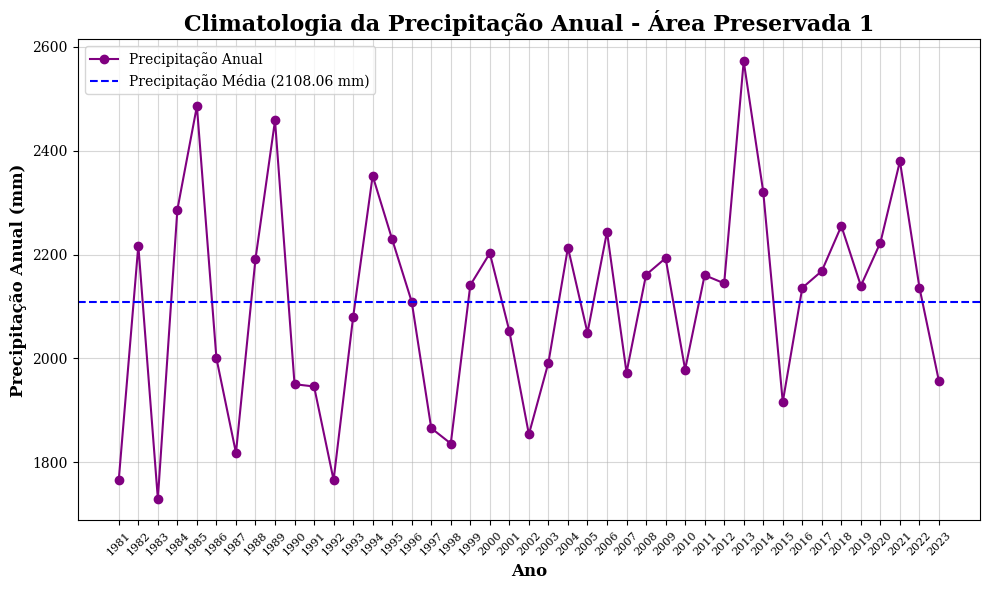

In [4]:
import matplotlib.pyplot as plt

# Função para plotar o gráfico
def plot_precipitation_trend(precipitation_df):
    # Cálculo da precipitação média anual
    mean_precipitation = precipitation_df["Total_Precipitação"].mean()

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(precipitation_df["Ano"], precipitation_df["Total_Precipitação"], label="Precipitação Anual", color='purple', marker='o')
    plt.axhline(mean_precipitation, color='blue', linestyle='--', label=f"Precipitação Média ({mean_precipitation:.2f} mm)")

    # Configurar título e rótulos
    plt.title("Climatologia da Precipitação Anual - Área Preservada 1", fontsize=16, fontweight='bold')
    plt.xlabel("Ano", fontsize=12, fontweight='bold')
    plt.ylabel("Precipitação Anual (mm)", fontsize=12, fontweight='bold')
    plt.xticks(precipitation_df["Ano"], rotation=45, fontsize=8)
    plt.grid(alpha=0.5)

    # Legenda
    plt.legend()
    
    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar
plot_precipitation_trend(precipitation_df)

# Cálculo da precipitação média por ano
precipitation_df["Precipitação Média"] = precipitation_df["Total_Precipitação"]

# Imprimir a precipitação média de cada ano
print("\n--- Precipitação Média Anual ---")
for index, row in precipitation_df.iterrows():
    print(f"Ano {row['Ano']}: {row['Precipitação Média']:.2f} mm")

# Chamar a função para plotar
plot_precipitation_trend(precipitation_df)



In [6]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Função para análise de tendência temporal
def analyze_trend_and_plot(season_df):
    # Calcular a regressão linear para a duração da estação seca
    slope, intercept, r_value, p_value, std_err = linregress(season_df["Ano"], season_df["Duração_Seca"])
    
    # Criar linha de tendência
    season_df["Trend_Line"] = intercept + slope * season_df["Ano"]

    # Plotar os resultados
    plt.figure(figsize=(10, 6))
    plt.plot(season_df["Ano"], season_df["Duração_Seca"], label="Duração da Estação Seca (Observada)", marker='o', color='blue')
    plt.plot(season_df["Ano"], season_df["Trend_Line"], label=f"Tendência (slope={slope:.2f})", color='red', linestyle="--")

    # Configurações do gráfico
    plt.title("Análise de Tendência - Duração da Estação Seca", fontsize=16, fontweight='bold')
    plt.xlabel("Ano", fontsize=12, fontweight='bold')
    plt.ylabel("Duração da Estação Seca (Pentadas)", fontsize=12, fontweight='bold')
    plt.grid(alpha=0.5)
    plt.legend()

    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

    # Exibir resultados estatísticos
    print("Análise de Tendência - Duração da Estação Seca")
    print(f"Coeficiente Angular (Slope): {slope:.2f}")
    print(f"Intercepto: {intercept:.2f}")
    print(f"Coeficiente de Determinação (R²): {r_value**2:.2f}")
    print(f"Valor-p: {p_value:.3f}")
    print("Conclusão:", "Há uma tendência significativa" if p_value < 0.05 else "Não há uma tendência significativa")
    print("\n")

# Aplicar a função para o DataFrame season_df
analyze_trend_and_plot(df)


KeyError: 'Ano'